<a href="https://colab.research.google.com/github/MamadouBousso/Pytorch_courses/blob/main/RegressionLineairePytorchSimple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Un modele de regression avec Pytorch
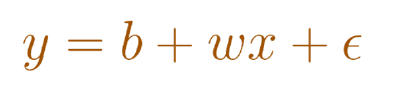

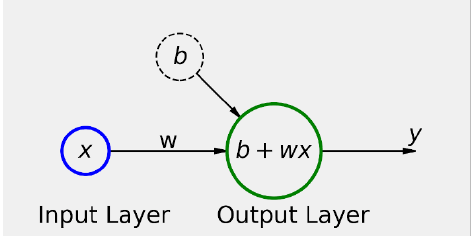

In [ ]:
!pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=db8b9b75be91a6ce8d1950200b4cfd5bbf7b3061943412032efc18477830d73e
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

### Generation des données

Generer 100 points x et calculer y avec b = 1 et w = 2 et du bruit gaussien

In [ ]:
N = 100
b = 1
w = 2

In [ ]:
np.random.seed(42)
x = np.random.rand(N,1)
epsilone = (.1 * np.random.randn(N, 1))
y = b + w*x + epsilone


### Creer les données de train et de test

In [ ]:
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)
# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]
# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]


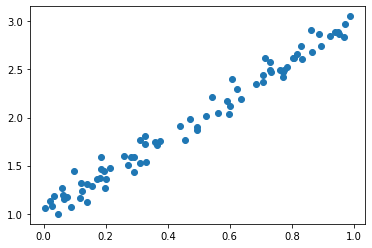

In [ ]:
plt.scatter(x_train,y_train)

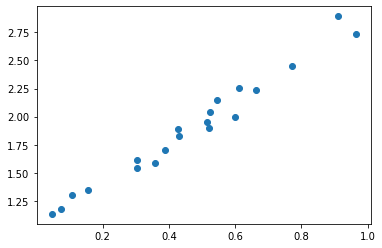

In [ ]:
plt.scatter(x_val,y_val)

## Gradient Descent

#### Initialisation des poids 

In [ ]:
# Etape 1: Initialisation des ppoids
np.random.seed(42)
w = np.random.randn(1)
b = np.random.randn(1)
print(b,w)

[-0.1382643] [0.49671415]


#### Calcul fonction prediction

In [ ]:
# Prediction_ pass forward
y_hat = w * x_train + b

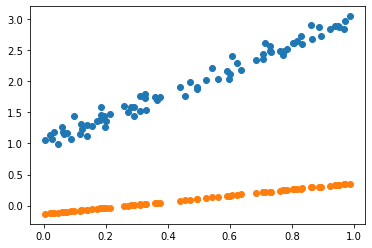

In [ ]:
plt.scatter(x_train,y_train)
plt.scatter(x_train,y_hat)

#### Calcul de l'erreur: MSE

In [ ]:
erreur = (y_hat - y_train)
loss_fn = ((y_hat - y_train)**2).mean()
#print(erreur)

#### Calcul du gradient 

Ici on utilise le batch gradient

In [ ]:
b_grad = 2*erreur.mean()
w_grad = 2*(x_train*erreur).mean()
print(b_grad)
print(w_grad)

-3.7147657833716528
-2.031191093805243


#### On met à jour les paramétres

Comme on cherche à minimiser on soustrait une partie des gradients avec le learning rate

In [ ]:
alpha = 0.001
b = b - alpha*b_grad
w = w - alpha*w_grad
print(w)
print(b)

[0.49874534]
[-0.13454954]


### Exercice: Repeter tout le processus jusqu'à 10 epoch et représenter les erreurs de train et de validation. Comparer vos resultats en utilisant la regression linéaire avec scikit-learn

Un epoch est complet quand tous les points du training set ont tous été utilisés pour faire le forward, le backward et la mise à jour.
* Quand on est en batch on utilise tous les points pour calculer la fonction perte. Un epoch = un update

* Quand on est en mini-batch, on fait un update par lot de données. Un epoch signifie que tous les lots ont été utilisés. Le nombre d'update est egale à N/l avec N taille des données et l nombre de lot

* Quand on est en stochatstic gradient descent, on met à jour pour chaque point et un epoch est quand tous les points ont été utlisés.

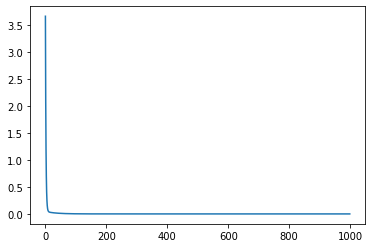

In [ ]:
np.random.seed(42)
w = np.random.randn(1)
b = np.random.randn(1)

erreurs = []

n_epoch = 1000

alpha = 0.1

for i in range(n_epoch):

  y_hat = w * x_train + b

  erreur = (y_hat - y_train)

  loss = (erreur**2).mean()

  b_grad = 2*erreur.mean()

  w_grad = 2*(x_train*erreur).mean()

  
  
  b = b - alpha*b_grad
  
  w = w - alpha*w_grad

  erreurs.append(loss)

else:
  plt.plot(erreurs)




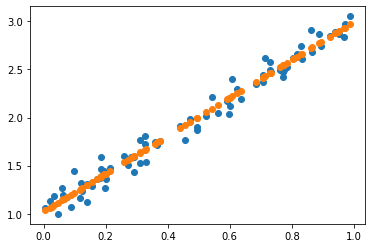

In [ ]:
plt.scatter(x_train,y_train)
plt.scatter(x_train,y_hat)

In [ ]:
print(b)
print(w)

[1.02354084]
[1.9689643]


#### Comparons avec scikit-learn


In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)
print(lr.intercept_,lr.coef_[0])
y_hat = lr.intercept_ + lr.coef_[0]*x_train

[1.02354075] [1.96896447]


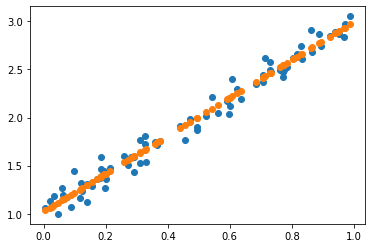

In [ ]:
plt.scatter(x_train,y_train)
plt.scatter(x_train,y_hat)

## Utilisons Pytorch

#### Convertissons les tableaux numpy en tenseurs pytorch

Deux methodes as_tensors ou from_numpy(). Tous les deux cree un tenseur qui partage les mêmes données avec le tableau numpy.

Si le tableau numpy est modifié alors les données sont modifiées

In [ ]:
x_train_tens = torch.from_numpy(x_train)

In [ ]:
y_train_tens = torch.from_numpy(y_train)

#### Les envoyer à des GPU s'il existe

In [ ]:
devices = 'cpu'
if torch.cuda.is_available():
  devices = torch.cuda.current_device()
  print("ici")
  x_train_tens = x_train_tens.cuda()
  y_train_tens = y_train_tens.cuda()

In [ ]:
print(devices)

cpu


In [ ]:
print(type(x_train), x_train_tens.device, x_train_tens.type())

<class 'numpy.ndarray'> cpu torch.DoubleTensor


#### Creation des paramétres

On cree les paramétres en mettant:

* leur require_grad à True pour que les calculs de gradients se fassent automatiquement

* on les affectue aussi à un device ( à faire toujours à leur creation)

In [ ]:
b = torch.tensor(1,requires_grad = True, dtype = torch.float,device = devices)
w = torch.tensor(1,requires_grad = True, dtype = torch.float,device = devices)

In [ ]:
print(b)

tensor(1., requires_grad=True)


#### Training

In [ ]:
y_hat_tens = b + w*x_train_tens

In [ ]:
erreur = y_hat_tens - y_train_tens

In [ ]:
loss = 2*(erreur**2).mean()

In [ ]:
loss.backward()

In [ ]:
print(y_hat_tens.requires_grad,y_train_tens.requires_grad,x_train_tens.requires_grad,b.requires_grad,w.requires_grad)

True False False True True


In [ ]:
print(b.grad,w.grad)

tensor(-1.9253) tensor(-1.2731)


**Attention: les gradients sont accumulés à chaque exécution des codes précédents**

In [ ]:
# Pour eviter l'accumulation des gradients on raméne les gradients à zero à chaque execution des cellules précédentes

b.grad.zero_()
w.grad.zero_()

tensor(0.)

#### Processus de training comme avec numpy

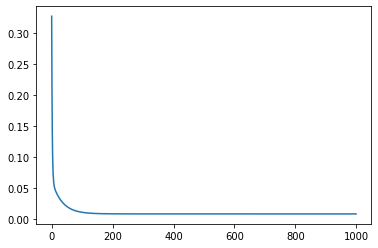

In [ ]:
torch.manual_seed(53)
b = torch.tensor(1,requires_grad = True, dtype = torch.float,device = devices)
w = torch.tensor(1,requires_grad = True, dtype = torch.float,device = devices)
erreurs = []

n_epoch = 1000

alpha = 0.1

for i in range(n_epoch):

  y_hat_tens = w * x_train_tens + b

  erreur_tens = (y_hat_tens - y_train_tens)

  loss_tens = (erreur_tens**2).mean()

  

  loss_tens.backward()
  # Attention on perd le grad, remplacer par un traitement in-place
  #b = b - alpha*b.grad
  
  #w = w - alpha*w.grad

  #In-place: mais là aussi erreur  car pytorch effectue une operartion
  # sur un tenseur qui a besoin d'un calcul dans le graphe. 
  #b -= b.grad

  #w -= w.grad
  # Solution pour les problémes ci-desssus
  with torch.no_grad():

    b -= alpha*b.grad
  
    w -= alpha*w.grad

    erreurs.append(loss_tens.numpy())
    

  # Attention: A la sortie les paramétres perdent le gradient donc grad = None, 
  
  b.grad.zero_()
  w.grad.zero_()
  
  
else:
  plt.plot(erreurs)
  


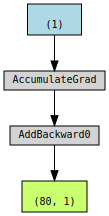

In [ ]:
b_nograd = torch.randn(1, requires_grad=True, dtype=torch.float, device=devices)
w = torch.randn(1, requires_grad=False, dtype=torch.float, device=devices)
yhat = b_nograd + w * x_train_tens
make_dot(yhat)

Regardons de plus près ces composants :
* cases bleues ((1)s) : ces cases correspondent aux tenseurs que nous utilisons comme paramètres, ceux que nous demandons à PyTorch de calculer les gradients 

* cases grises (MulBackward0 et AddBackward0) : une opération Python qui implique un tenseur de calcul de gradient ou ses dépendances

* case verte ((80, 1)) : le tenseur utilisé comme point de départ du calcul de gradient (en supposant que la méthode backward() est appelée depuis la variable utilisée pour visualiser le graphique) — ils sont calculés de bas en haut dans un graphique

Le graph change un paramétre n'a plus besoin de gradient

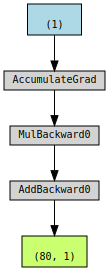

In [ ]:
b_nograd = torch.randn(1, requires_grad=False, dtype=torch.float, device=devices)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=devices)
yhat = b_nograd + w * x_train_tens
make_dot(yhat)

On peut controler aussi le flow du gradient

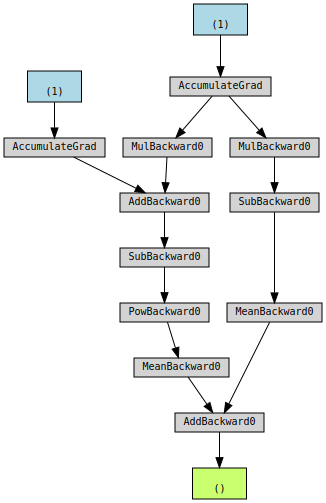

In [ ]:
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=devices)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=devices)
yhat = b + w * x_train_tens
error = yhat - y_train_tens
loss = (error ** 2).mean()
# this makes no sense!!
if loss > 0:
  yhat2 = w * x_train_tens
  error2 = yhat2 - y_train_tens
# neither does this :-)
loss += error2.mean()
make_dot(loss)

### Optimiser

Il existe de nombreux optimiseurs : SGD est le plus basique d'entre eux, et
Adam est l'un des plus populaires.
Différents optimiseurs utilisent des mécanismes différents pour mettre à jour le
paramètres, mais ils atteignent tous le même objectif avec des
chemins différents.

Au lieu de mettre à jour et remettre les gradients à zero manuellement, on utilise un optimiseur pour le faire. on remplace 
cette partie:



```
 # Solution pour les problémes ci-desssus
  with torch.no_grad():

    b -= alpha*b.grad
  
    w -= alpha*w.grad

    erreurs.append(loss_tens.numpy())
    

  # Attention: A la sortie les paramétres perdent le gradient donc grad = None, 
  
  b.grad.zero_()
  w.grad.zero_()

```

par:



```
optimizer.step() 

optimizer.zero_grad() 

```





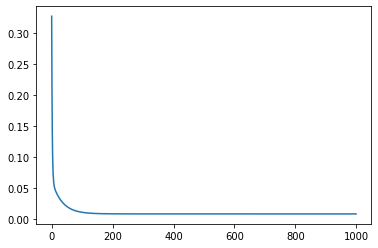

In [ ]:
# le code change

torch.manual_seed(53)
b = torch.tensor(1,requires_grad = True, dtype = torch.float,device = devices)
w = torch.tensor(1,requires_grad = True, dtype = torch.float,device = devices)
erreurs = []

n_epoch = 1000

alpha = 0.1


optimizer = optim.SGD([b,w],lr = alpha)

for i in range(n_epoch):

  y_hat_tens = w * x_train_tens + b

  erreur_tens = (y_hat_tens - y_train_tens)

  loss_tens = (erreur_tens**2).mean()

  

  loss_tens.backward()
  
  optimizer.step()

  erreurs.append(loss_tens.detach().numpy())
    

  # Attention: A la sortie les paramétres perdent le gradient donc grad = None, 
  
  optimizer.zero_grad()
  
else:
  plt.plot(erreurs)
  


### Fonction Loss
Pytorch fournit un ensemble de fonction perte avec le module nn.
Dans le cas de l'erreur sur les moindres carrés on peut utiliser **nn.MSELoss(reduction = 'mean')**.

* Ces fonctions sont d'ordre superieur donc génére une autre fonction

* On peut ajouter aussi une fonction de reduction comme la fonction mean dans le cas de notre probleme

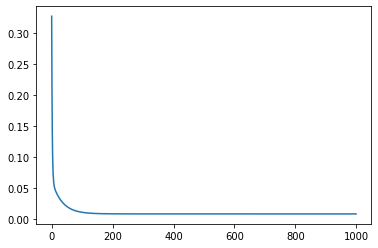

In [ ]:
# le code change

torch.manual_seed(53)
b = torch.tensor(1,requires_grad = True, dtype = torch.float,device = devices)
w = torch.tensor(1,requires_grad = True, dtype = torch.float,device = devices)
erreurs = []

n_epoch = 1000

alpha = 0.1

optimizer = optim.SGD([b,w],lr = alpha)

#loss_fn  = nn.MSELoss(reduction = 'mean')
loss_fn  = nn.MSELoss(reduction = 'mean')
for i in range(n_epoch):

  y_hat_tens = w * x_train_tens + b

  #erreur_tens = (y_hat_tens - y_train_tens)

  #loss_tens = (erreur_tens**2).mean()

  loss_tens = loss_fn(y_hat_tens , y_train_tens)

  

  loss_tens.backward()
  
  optimizer.step()

  #erreurs.append(loss_tens.detach().numpy())

  # On peut transformer le tenseur en liste au lieu d'avoir à le detacher du graphe de calcul c'est plus simple

  erreurs.append(loss_tens.tolist())
  # Ou erreurs.append(loss_tens.item())


  # Attention: A la sortie les paramétres perdent le gradient donc grad = None, 
  
  optimizer.zero_grad()
  
else:
  plt.plot(erreurs)

## Creation du modéle

C'est la partie la plus délicate. Il faut commencer par:

* appeler la methode __init__ de la classe nn qui est la classe mére

* initialiser les paramétres b et w dans la fonction **__init__()** de la classe. Il est important de les envelopper avec la classe **nn.Parameter** pour en faire des paramétres du modele. Cela permet: 



> d'utiliser la methode **parameters()** du modele pour disposer de tous les paramétres



 



> d'utiliser la methode **state_dict()** pour disposer des valeurs courantes des pramétres. Ce methode retourne un dictionnaire qui ne contient que les paramétres concernés par l'apprentissage. A ne pas confondre avec le **state_dict()** de l'optimiseur qui contient aussi des hyperparametres



* implementer la methode forward(self,x) qui fournit une prediction du modele sachant l'input x



In [ ]:
# Modele pour notre regression lineaire

class ManuelRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.b = nn.Parameter(torch.randn(1,requires_grad = True,dtype = torch.float))
    self.w = nn.Parameter(torch.randn(1,requires_grad = True,dtype = torch.float))

  def forward(self,x):
    y = self.w * x + self.b
    return y

[Parameter containing:
tensor([1.0235], requires_grad=True), Parameter containing:
tensor([1.9690], requires_grad=True)]


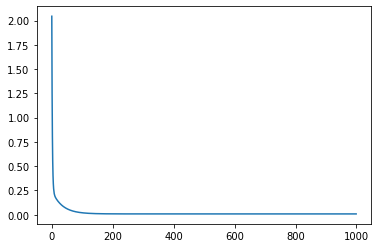

In [ ]:
# le code change

torch.manual_seed(53)
# Il est important d'envoyer le modéle dans le device où se trouve les données
model = ManuelRegression().to(devices)

#b = torch.tensor(1,requires_grad = True, dtype = torch.float,device = devices)
#w = torch.tensor(1,requires_grad = True, dtype = torch.float,device = devices)
erreurs = []

n_epoch = 1000

alpha = 0.1

optimizer = optim.SGD(model.parameters(),lr = alpha)

loss_fn  = nn.MSELoss(reduction = 'mean')

for i in range(n_epoch):
  # Attention: permet juste de mettre le modéle en mode training et non en mode evalation. Par exemple le dropout n'est fait que durant 
  # le training
  model.train()

  # On n'appelle pas la methode froward() mais juste le modele
  y_hat_tens = model(x_train_tens)

  #erreur_tens = (y_hat_tens - y_train_tens)

  #loss_tens = (erreur_tens**2).mean()

  loss_tens = loss_fn(y_hat_tens , y_train_tens)

  

  loss_tens.backward()
  
  optimizer.step()

  #erreurs.append(loss_tens.detach().numpy())

  # On peut transformer le tenseur en liste au lieu d'avoir à le detacher du graphe de calcul c'est plus simple

  erreurs.append(loss_tens.tolist())
  # Ou erreurs.append(loss_tens.item())


  # Attention: A la sortie les paramétres perdent le gradient donc grad = None, 
  
  optimizer.zero_grad()
  
else:
  plt.plot(erreurs)
  print(list(model.parameters()))

### Utilisons le modéle lineaire de pytorch
Pytorch comporte dans son module **nn** une methode **Linear(in_features, out_features)** qui permet d'implementer un module linéaire. On peut réécrire notre modéle.

In [ ]:
class ManuelRegressionNew(nn.Module):
  def __init__(self):
    super().__init__()
    self.lin = nn.Linear(1,1)

  def forward(self,x):
    return self.lin(x)
    


[Parameter containing:
tensor([[0.4912]], requires_grad=True), Parameter containing:
tensor([0.5226], requires_grad=True)]
[Parameter containing:
tensor([[1.7554]], requires_grad=True), Parameter containing:
tensor([1.1327], requires_grad=True)]


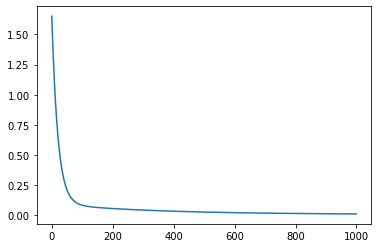

In [ ]:
# le code change

torch.manual_seed(53)

X,y = x_train_tens.float(),y_train_tens.float()
# Il est important d'envoyer le modéle dans le device où se trouve les données
modelnew = ManuelRegressionNew().to(devices).float()

print(list(modelnew.parameters()))

#b = torch.tensor(1,requires_grad = True, dtype = torch.float,device = devices)
#w = torch.tensor(1,requires_grad = True, dtype = torch.float,device = devices)
erreurs = []

n_epoch = 1000

alpha = 0.01

optimizer = optim.SGD(modelnew.parameters(),lr = alpha)

loss_fn  = nn.MSELoss(reduction = 'mean')



for i in range(n_epoch):
  # Attention: permet juste de mettre le modéle en mode training et non en mode evalation. Par exemple le dropout n'est fait que durant 
  # le training
  modelnew.train()

  # On n'appelle pas la methode froward() mais juste le modele
  y_hat_tens = modelnew(X)
  

  #erreur_tens = (y_hat_tens - y_train_tens)

  #loss_tens = (erreur_tens**2).mean()

  loss_tens = loss_fn(y_hat_tens , y)

  

  loss_tens.backward()
  
  optimizer.step()

  

  #erreurs.append(loss_tens.detach().numpy())

  # On peut transformer le tenseur en liste au lieu d'avoir à le detacher du graphe de calcul c'est plus simple

  erreurs.append(loss_tens.tolist())
  # Ou erreurs.append(loss_tens.item())


  # Attention: A la sortie les paramétres perdent le gradient donc grad = None, 
  
  optimizer.zero_grad()
  
else:
  plt.plot(erreurs)
print(list(modelnew.parameters()))

### Les commandes magiques de jupyter

`%%writefile` : permet d'ecrire le code d'une cellule dans un fichier  sans les exécuter

`%run` : permet d'exécuter la fonction evoquée independamment du reste du notebook. On peut utiliser l'option `-i` pour rendre toutes les variables définies disponibles

Par exemple on peut ecrire la partie data preparation dans un fichier v0.py



In [ ]:
import torch

In [ ]:
!mkdir data_preparation

mkdir: cannot create directory ‘data_preparation’: File exists


In [ ]:
%%writefile data_preparation/v0.py
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# Our data was in Numpy arrays, but we need to transform them
# into PyTorch's Tensors and then we send them to the
# chosen device
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

Overwriting data_preparation/v0.py


In [ ]:
%run -i data_preparation/v0.py

<Figure size 432x288 with 0 Axes>

### Fonction de training avec les fonctions d'ordre superieur

Nous savons que quand un modéle tourne, il ne change pas d'optmiseur, de modele et fonction loss. Nous allons ecrire une fonction d'ordre superieur basé sur ces données.

In [ ]:
!mkdir model_configuration

mkdir: cannot create directory ‘model_configuration’: File exists


In [ ]:
%%writefile model_configuration/v0.py
def training(model, optimiseur,loss_fn):
  def training_model_pas(X,y):
    
      # Attention: permet juste de mettre le modéle en mode training et non en mode evalation. Par exemple le dropout n'est fait que durant 
      # le training
      model.train()

      # On n'appelle pas la methode froward() mais juste le modele
      y_hat_tens = model(X)
  

      #erreur_tens = (y_hat_tens - y_train_tens)

      #loss_tens = (erreur_tens**2).mean()

      loss_tens = loss_fn(y_hat_tens , y)

  

      loss_tens.backward()
  
      optimiseur.step()

  

      #erreurs.append(loss_tens.detach().numpy())

      # On peut transformer le tenseur en liste au lieu d'avoir à le detacher du graphe de calcul c'est plus simple

     

      # Attention: A la sortie les paramétres perdent le gradient donc grad = None, 
  
      optimiseur.zero_grad()

      return loss_tens.tolist()

  
    
  return training_model_pas


Writing model_configuration/v0.py


FileNotFoundError: ignored

In [ ]:
%run -i model_configuration/v0.py

In [ ]:

%%writefile model_configuration/v1.py

# le code change

torch.manual_seed(53)

device  = 'cuda' if torch.cuda.is_available() else 'cpu'


model = nn.Sequential(nn.Linear(1,1)).to(device)


#b = torch.tensor(1,requires_grad = True, dtype = torch.float,device = devices)
#w = torch.tensor(1,requires_grad = True, dtype = torch.float,device = devices)
erreurs = []

n_epoch = 1000

alpha = 0.01

optimizer = optim.SGD(model.parameters(),lr = alpha)

loss_fn  = nn.MSELoss(reduction = 'mean')

train = training(model, optimizer,loss_fn)



Writing model_configuration/v1.py


In [ ]:
%run -i model_configuration/v1.py

In [ ]:
train

<function __main__.training.<locals>.training_model_pas>

In [ ]:
!mkdir model_training

mkdir: cannot create directory ‘model_training’: File exists


In [ ]:

%%writefile model_training/v0.py 
epochs = 1000
erreurs = []
for i in range(epochs):
  loss = train(x_train_tensor,y_train_tensor)
  erreurs.append(loss)
print(erreurs)

Overwriting model_training/v0.py


In [ ]:
%run -i model_training/v0.py

[1.650896430015564, 1.5744428634643555, 1.5017262697219849, 1.4325631856918335, 1.3667796850204468, 1.3042103052139282, 1.244696855545044, 1.1880899667739868, 1.1342467069625854, 1.0830321311950684, 1.034316897392273, 0.9879788160324097, 0.9439012408256531, 0.9019731283187866, 0.8620893359184265, 0.824149489402771, 0.7880584001541138, 0.7537253499031067, 0.7210642099380493, 0.6899932026863098, 0.6604341268539429, 0.6323129534721375, 0.605559229850769, 0.5801059007644653, 0.5558892488479614, 0.5328484773635864, 0.5109262466430664, 0.4900675415992737, 0.47022026777267456, 0.45133501291275024, 0.4333643913269043, 0.41626375913619995, 0.3999904990196228, 0.38450390100479126, 0.3697654902935028, 0.35573869943618774, 0.3423885703086853, 0.32968199253082275, 0.31758734583854675, 0.3060747981071472, 0.2951158285140991, 0.2846831679344177, 0.2747511565685272, 0.2652953267097473, 0.2562922537326813, 0.24771973490715027, 0.23955675959587097, 0.23178331553936005, 0.22438032925128937, 0.21732957661

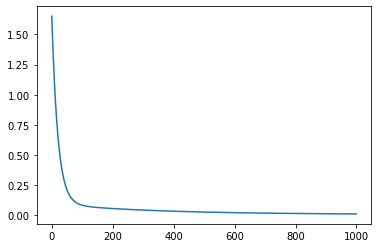

In [ ]:
import matplotlib.pyplot as plt
plt.plot(erreurs)

In [ ]:
print(model.state_dict())

OrderedDict([('0.weight', tensor([[1.7554]])), ('0.bias', tensor([1.1327]))])
